# CA0 - AI

## Farbod Siahkali - 810198510

This code is an implementation of various data manipulation techniques using the pandas library in Python. The code loads data from a CSV file, performs data cleaning by filling in missing values with the mode of the corresponding column, drops unnecessary columns, and normalizes the data. It also converts categorical data into numerical data, visualizes data using histograms, and finally uses the data to plot a Gaussian curve.

The code performs the following operations:

1. Imports necessary libraries
2. Reads the CSV file and displays the first few rows, descriptive statistics, and the last few rows of the data.
3. Replaces categorical gender data with binary numerical values.
4. Identifies and fills missing values with the mode of the corresponding column.
5. Drops the 'fnlwgt' column from the data.
6. Filters the data to find the number of black people over the age of 30 who work in private jobs.
7. Calculates the average number of hours per week worked by people with a Bachelor's degree using pandas built-in mean() function.
8. Calculates the same result as above but without using the mean() function, and calculates the time taken for the same.
9. Plots histograms for various columns of the data.
10. Normalizes the data by standardizing the values using the mean and standard deviation.
11. Converts categorical data to numerical data and standardizes the values.
12. Plots Gaussian curves to compare the distribution of data with salaries above and below 50k for various columns of the data

# Part 1

The head() method returns a specified number of rows, string from the top. The head() method returns the first 5 rows if a number is not specified. Note: The column names will also be returned, in addition to the specified rows.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

df = pd.read_csv('./train.csv')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.

In [2]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29825.000000,2.982500e+04,29825.000000,29825.000000,29825.000000,29825.000000
mean,38.581425,1.897389e+05,10.079229,1094.586052,86.476513,40.434334
std,13.652005,1.053738e+05,2.571678,7485.908646,401.195078,12.308174
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The "tail" method is similar to "head" method expect it shows the five last rows of the dataset.

In [3]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29820,48,Local-gov,127921,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
29821,32,Private,42617,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,30,United-States,<=50K
29822,47,Local-gov,191389,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
29823,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
29824,18,Private,215110,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,<=50K


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       28154 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      28149 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29288 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


# Part 2

In [5]:
df['sex']

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
29820      Male
29821    Female
29822    Female
29823    Female
29824      Male
Name: sex, Length: 29825, dtype: object

Converting the sex column using astype

In [6]:
df['sex'] = (df['sex'] == 'Male').astype(int)
df['sex']

0        1
1        1
2        1
3        1
4        0
        ..
29820    1
29821    0
29822    0
29823    0
29824    1
Name: sex, Length: 29825, dtype: int32

# Part 3

Getting the number of Nulls in each column.

In [7]:
df.isnull().sum()

age                  0
workclass         1671
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1676
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     537
salary               0
dtype: int64

Filling the Nan values with the mode of columns.

Advantages :
* Mean imputation is very simple to understand and to apply.

* We can keep our whole dataset.

* The sample mean of your variable is not biased.

Disadvantages :
* The problem isn’t specifically that it reduces the variance, but that it changes the variance of the dataset, making it a less accurate estimate for the variance of the actual population. More generally, it will make the dataset a less accurate reflection of the population, in many ways.

* Mean and mode ignore feature correlations and might have a negative effect on accuracy when training our ML model.

* Can't be used in categorical features.

In [8]:
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country']=df['native-country'].fillna(df['native-country'].mode()[0])

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# Part 4

Dropping the fnlwgt column which has uniqe value for each row.

In [9]:
train = df.drop(['fnlwgt'], axis=1)

train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29820,48,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,40,United-States,<=50K
29821,32,Private,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,0,0,0,30,United-States,<=50K
29822,47,Local-gov,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,0,0,0,35,United-States,<=50K
29823,38,Private,Prof-school,15,Married-civ-spouse,Sales,Wife,White,0,0,0,40,United-States,<=50K


# Part 5

Counting the number of men and women:

In [10]:
train['sex'].value_counts()

1    19956
0     9869
Name: sex, dtype: int64

Finding the number of Married men:

In [11]:
train[train['marital-status']=='Married-civ-spouse']['sex'].value_counts()[1]

12168

# Part 6

Filtering the dataframe to find the black men with Private job with age more than 30:

In [12]:
a = train[train['age']>30]
a = a[a['workclass']=='Private']
a = a[a['race']=='Black']
len(a)

1373

# Part 7

With vectorization:

In [13]:
t1=time.time()
print('Result : ',train[train['education']=='Bachelors']['hours-per-week'].mean())
t2=time.time()
print('Elapsed time:',t2-t1)

Result :  42.546669366268475
Elapsed time: 0.008361339569091797


# Part 8

Without vectorization:

In [14]:
size = train[train['education']=='Bachelors']['hours-per-week'].shape[0]
temp = 0
t1 = time.time()
for i in train[train['education']=='Bachelors']['hours-per-week'].index:
    temp+=train[train['education']=='Bachelors']['hours-per-week'][i]
result=temp/size
t2=time.time()
print('Result : ',result)
print('Elapsed time : ',t2-t1)

Result :  42.546669366268475
Elapsed time :  8.540365219116211


We can see vectorization is more efficient and more than 30 times faster than looping.

# Part 9

In this part, we visualize the dataset's attributes with histogram plots. Visualizing helps us better understand data distributions in every dataset's attribute.

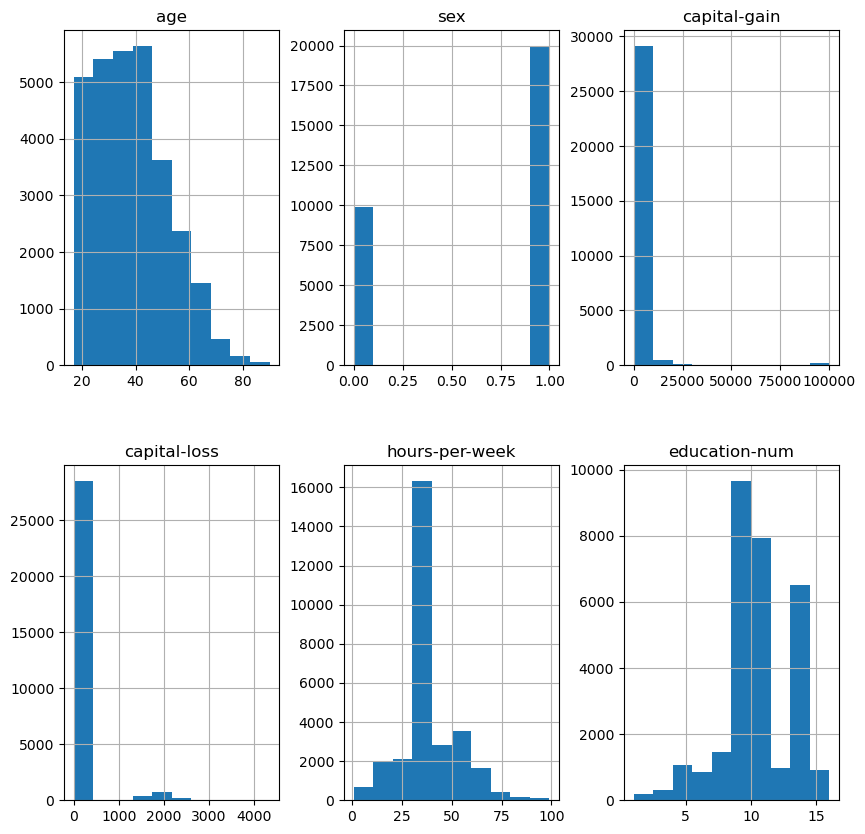

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(10,10))

train.hist(column='age', ax=axs[0,0])
train.hist(column='sex', ax=axs[0,1])
train.hist(column='capital-gain', ax=axs[0,2])
train.hist(column='capital-loss', ax=axs[1,0])
train.hist(column='hours-per-week', ax=axs[1,1])
train.hist(column='education-num', ax=axs[1,2])

# fig.subplots_adjust(wspace=0.7, hspace=0.7)
plt.show()


# Part 10

The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model. In this part we use Z-score normalization. Z-score is a variation of scaling that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1. It’s useful when there are a few outliers, but not so extreme that you need clipping.
$$Z=\frac{x-\mu}{sigma}$$

In [16]:
train['age']=(train['age']-train['age'].mean())/train['age'].std()
train['sex']=(train['sex']-train['sex'].mean())/train['sex'].std() 
train['education-num']=(train['education-num']-train['education-num'].mean())/train['education-num'].std()
train['capital-gain']=(train['capital-gain']-train['capital-gain'].mean())/train['capital-gain'].std()
train['capital-loss']=(train['capital-loss']-train['capital-loss'].mean())/train['capital-loss'].std()
train['hours-per-week']=(train['hours-per-week']-train['hours-per-week'].mean())/train['hours-per-week'].std()

train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.030660,State-gov,Bachelors,1.135745,Never-married,Adm-clerical,Not-in-family,White,0.703222,0.144193,-0.215547,-0.035288,United-States,<=50K
1,0.836403,Self-emp-not-inc,Bachelors,1.135745,Married-civ-spouse,Exec-managerial,Husband,White,0.703222,-0.146220,-0.215547,-2.228952,United-States,<=50K
2,-0.042589,Private,HS-grad,-0.419659,Divorced,Handlers-cleaners,Not-in-family,White,0.703222,-0.146220,-0.215547,-0.035288,United-States,<=50K
3,1.056151,Private,11th,-1.197362,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.703222,-0.146220,-0.215547,-0.035288,United-States,<=50K
4,-0.775082,Private,Bachelors,1.135745,Married-civ-spouse,Prof-specialty,Wife,Black,-1.421978,-0.146220,-0.215547,-0.035288,Cuba,<=50K


# Part 11

Making float columns into categorical integer values.

In [17]:
train['workclass']=train['workclass'].astype('category').cat.codes
train['workclass']=(train['workclass']-train['workclass'].mean())/train['workclass'].std()

train['marital-status']=train['marital-status'].astype('category').cat.codes
train['marital-status']=(train['marital-status']-train['marital-status'].mean())/train['marital-status'].std()

train['occupation']=train['occupation'].astype('category').cat.codes
train['occupation']=(train['occupation']-train['occupation'].mean())/train['occupation'].std()

train['relationship']=train['relationship'].astype('category').cat.codes
train['relationship']=(train['relationship']-train['relationship'].mean())/train['relationship'].std()

train['native-country']=train['native-country'].astype('category').cat.codes
train['native-country']=(train['native-country']-train['native-country'].mean())/train['native-country'].std()

train.drop(columns='education')


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.030660,2.622516,1.135745,0.918457,-1.541412,-0.278207,White,0.703222,0.144193,-0.215547,-0.035288,0.261237,<=50K
1,0.836403,1.719563,1.135745,-0.407149,-0.787211,-0.901237,White,0.703222,-0.146220,-0.215547,-2.228952,0.261237,<=50K
2,-0.042589,-0.086344,-0.419659,-1.732754,-0.284409,-0.278207,White,0.703222,-0.146220,-0.215547,-0.035288,0.261237,<=50K
3,1.056151,-0.086344,-1.197362,-0.407149,-0.284409,-0.901237,Black,0.703222,-0.146220,-0.215547,-0.035288,0.261237,<=50K
4,-0.775082,-0.086344,1.135745,-0.407149,0.721193,2.213914,Black,-1.421978,-0.146220,-0.215547,-0.035288,-5.351797,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29820,0.689904,-1.892251,1.135745,-0.407149,0.721193,-0.901237,White,0.703222,-0.146220,-0.215547,-0.035288,0.261237,<=50K
29821,-0.482085,-0.086344,-0.030808,-1.732754,0.721193,-0.278207,White,-1.421978,-0.146220,-0.215547,-0.847756,0.261237,<=50K
29822,0.616655,-1.892251,-0.419659,-1.732754,-1.541412,1.590884,White,-1.421978,-0.146220,-0.215547,-0.441522,0.261237,<=50K
29823,-0.042589,-0.086344,1.913448,-0.407149,1.223994,2.213914,White,-1.421978,-0.146220,-0.215547,-0.035288,0.261237,<=50K


# Part 12

Breaking the dataframe into two frames.

In [18]:
above50k = train[train['salary']=='>50K']
below50k = train[train['salary']=='<=50K']
below50k.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.030660,2.622516,Bachelors,1.135745,0.918457,-1.541412,-0.278207,White,0.703222,0.144193,-0.215547,-0.035288,0.261237,<=50K
1,0.836403,1.719563,Bachelors,1.135745,-0.407149,-0.787211,-0.901237,White,0.703222,-0.146220,-0.215547,-2.228952,0.261237,<=50K
2,-0.042589,-0.086344,HS-grad,-0.419659,-1.732754,-0.284409,-0.278207,White,0.703222,-0.146220,-0.215547,-0.035288,0.261237,<=50K
3,1.056151,-0.086344,11th,-1.197362,-0.407149,-0.284409,-0.901237,Black,0.703222,-0.146220,-0.215547,-0.035288,0.261237,<=50K
4,-0.775082,-0.086344,Bachelors,1.135745,-0.407149,0.721193,2.213914,Black,-1.421978,-0.146220,-0.215547,-0.035288,-5.351797,<=50K


In [19]:
above50k.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,0.982901,1.719563,HS-grad,-0.419659,-0.407149,-0.787211,-0.901237,White,0.703222,-0.146220,-0.215547,0.370946,0.261237,>50K
8,-0.555334,-0.086344,Masters,1.524597,0.918457,0.721193,-0.278207,White,-1.421978,1.735182,-0.215547,0.777180,0.261237,>50K
9,0.250408,-0.086344,Bachelors,1.135745,-0.407149,-0.787211,-0.901237,White,0.703222,0.545480,-0.215547,-0.035288,0.261237,>50K
10,-0.115838,-0.086344,Some-college,-0.030808,-0.407149,-0.787211,-0.901237,Black,0.703222,-0.146220,-0.215547,3.214585,0.261237,>50K
11,-0.628584,2.622516,Bachelors,1.135745,-0.407149,0.721193,-0.901237,Asian-Pac-Islander,0.703222,-0.146220,-0.215547,-0.035288,-3.040548,>50K


Now we sketch the pdf plot for every feature. We use a normal distribution with corresponding mean and variance. scipy.stats() function can helps us for sketch Probability Density (PDF) function for every feature. We look for the feature that has a significant difference between the two dataframes.

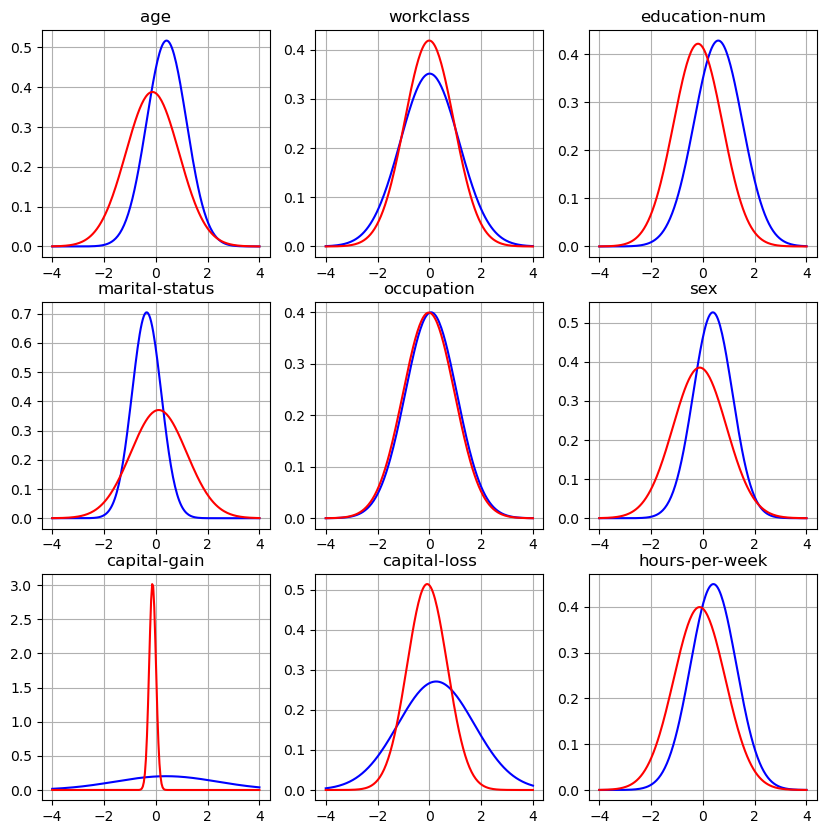

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
col = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

for idx, i in enumerate(col) :
    row = idx // 3
    col = idx % 3
    s1 = above50k[i].mean()
    s2 = above50k[i].std()
    x = np.linspace(-4,4,200)
    y = norm.pdf(x,s1,s2)
    axs[row, col].plot(x,y, c='b')
    s3=below50k[i].mean()
    s4=below50k[i].std()
    x=np.linspace(-4,4,200)
    y2=norm.pdf(x,s3,s4)
    axs[row, col].plot(x,y2, c='r')
    axs[row, col].grid()
    axs[row, col].set_title(i)

plt.show()


We choose the 'capital-gain' feature because of it's obvious amplitude difference.

In [21]:
df = pd.read_csv("test.csv")
df = df.drop(columns='fnlwgt')

above_50k = df[df["salary"] == ">50K"]
below_50k = df[df["salary"] == "<=50K"]

above_50k = above_50k.select_dtypes(include=["int64", "float64"])
below_50k = below_50k.select_dtypes(include=["int64", "float64"])

max_diff = -float("inf")
best_feature = ""

for col in above_50k.columns:
    pdf_above = norm.pdf(above_50k[col].mean(), above_50k[col].std())
    pdf_below = norm.pdf(below_50k[col].mean(), below_50k[col].std())
    diff = pdf_above - pdf_below
    if diff > max_diff:
        max_diff = diff
        best_feature = col

print("Best feature for estimating salary: ", best_feature)

Best feature for estimating salary:  capital-gain


Predicting the salary of each row by comparing the pdf of the selected feature.

In [33]:
mean_0 = df[df['salary'] == '<=50K'][best_feature].mean()
std_0 = df[df['salary'] == '<=50K'][best_feature].std()
mean_1 = df[df['salary'] == '>50K'][best_feature].mean()
std_1 = df[df['salary'] == '>50K'][best_feature].std()
# tell me what is happening in the next line:
pdf_0 = norm.pdf(df[best_feature], mean_0, std_0)
pdf_1 = norm.pdf(df[best_feature], mean_1, std_1)

predictions = np.where(pdf_1 > pdf_0, '>50K', '<=50K')
df['pred'] = predictions
num_correct = sum(df['salary'] == df['pred'])
total_preds = len(df)
accuracy = num_correct / total_preds * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 77.89%


In [74]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,pred
0,25,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
1,36,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,32,United-States,>50K,<=50K
2,40,Private,Assoc-voc,11,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,20,United-States,<=50K,<=50K
3,56,Self-emp-not-inc,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,20,United-States,<=50K,<=50K
4,50,Private,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,>50K,<=50K


Saving the dataframe containing the prediction column.

In [75]:
df.to_csv("test_with_preds.csv", index=False)